In [1]:
## Importing the libraries that are needed for this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
## importing the dataset file for analysis
data = pd.read_csv("X:\Career\Personal Projects\Russia_Ukraine_War_Twitter_Data\Russia_Ukraine_Dataset\Russia_Ukraine_Twitter_stats.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1569867529010712577  1569519513363968001  2022-09-14 01:56:00 UTC   
1  1569867528381386754  1569867528381386754  2022-09-14 01:56:00 UTC   
2  1569867527479611392  1569867527479611392  2022-09-14 01:55:59 UTC   
3  1569867526536073216  1569822795940655105  2022-09-14 01:55:59 UTC   
4  1569867522245103616  1569867522245103616  2022-09-14 01:55:58 UTC   

         date      time  timezone              user_id         username  \
0  2022-09-14  01:56:00         0           2474200088    michelleviise   
1  2022-09-14  01:56:00         0  1519540154985242624   davidbellomast   
2  2022-09-14  01:55:59         0            282762416       lasher1332   
3  2022-09-14  01:55:59         0  1511742565414244352    heyshreyanshu   
4  2022-09-14  01:55:58         0  1272052285858816000  int_affairsnews   

                      name place  ... geo source user_rt_id user_rt  \
0           Michelle Viise   NaN  ... NaN    

In [3]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [4]:
## as we need only 3 columcns for this project so we will filter this by selecting only these columns

data = data[["username","tweet","language"]]

In [5]:
## determining the null data in the table

data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
## Lets determine the language in which the data has been printed
data["language"].value_counts()

en     8927
pt      414
it      194
qme      74
in       58
und      47
de       47
es       37
zh       31
ja       30
ru       19
qht      16
ca       16
nl       14
fi       11
fr       11
th        9
uk        7
vi        5
ar        5
ro        5
tl        5
qam       4
hi        3
et        3
da        3
no        2
cs        2
ko        2
pl        2
cy        1
sv        1
am        1
is        1
Name: language, dtype: int64

In [7]:
## Now lets remove the language errors from the dataset
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NightMare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


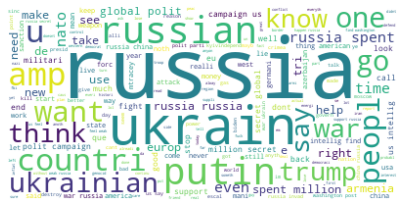

In [14]:
## Most frequent words that has been used by the people to show their feeling
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
## mentioning the views of the peoples 
## categorizing the people's view in 3 categories Positive, Negative and Neutral


nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NightMare\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  simonforco took  year war russia ukrain us act...     0.119     0.183   
1  ethiopian troll copi russia everyth bad russia...     0.000     0.333   
2  damn commi charg r desper theyr shake boot alp...     0.000     0.173   
3  derekjgrossman dont think iran worth much indi...     0.000     0.156   
4  utah ukrainian communiti hope counterattack ru...     0.487     0.000   

   Neutral  
0    0.698  
1    0.667  
2    0.827  
3    0.844  
4    0.513  


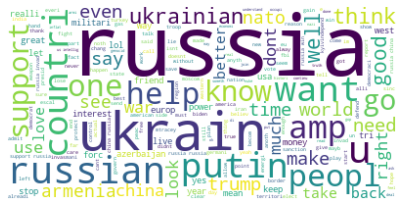

In [15]:
## Most frequent words used by the people to show positivity 
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

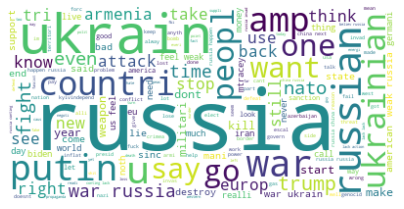

In [16]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()